<a href="https://colab.research.google.com/github/diaputr/machine-learning/blob/main/Modul_11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1: Klasifikasi 🐱 dan 🐶

## Langkah 1 - Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/ML/Ming11/dataset'

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(f'{path}/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 6955 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(f'{path}/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2010 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1. Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
218/218 [==============================] - 44s 186ms/step - loss: 0.6823 - accuracy: 0.5810 - val_loss: 0.6895 - val_accuracy: 0.5124
Epoch 2/25
218/218 [==============================] - 36s 163ms/step - loss: 0.6490 - accuracy: 0.6308 - val_loss: 0.6617 - val_accuracy: 0.6035
Epoch 3/25
218/218 [==============================] - 36s 164ms/step - loss: 0.6070 - accuracy: 0.6728 - val_loss: 0.5844 - val_accuracy: 0.6955
Epoch 4/25
218/218 [==============================] - 35s 162ms/step - loss: 0.5691 - accuracy: 0.7124 - val_loss: 0.5492 - val_accuracy: 0.7184
Epoch 5/25
218/218 [==============================] - 36s 165ms/step - loss: 0.5400 - accuracy: 0.7318 - val_loss: 0.5383 - val_accuracy: 0.7378
Epoch 6/25
218/218 [==============================] - 35s 162ms/step - loss: 0.5175 - accuracy: 0.7426 - val_loss: 0.5285 - val_accuracy: 0.7408
Epoch 7/25
218/218 [==============================] - 36s 164ms/step - loss: 0.5031 - accuracy: 0.7511 - val_loss: 0.5155 - val_ac

## Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(f'{path}/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 164ms/step


# Praktikum 2: Klasifikasi Multi-label dengan Data CIFAT

## Langkah 1 - Load Library

In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Langkah 3 - Verifikasi Data

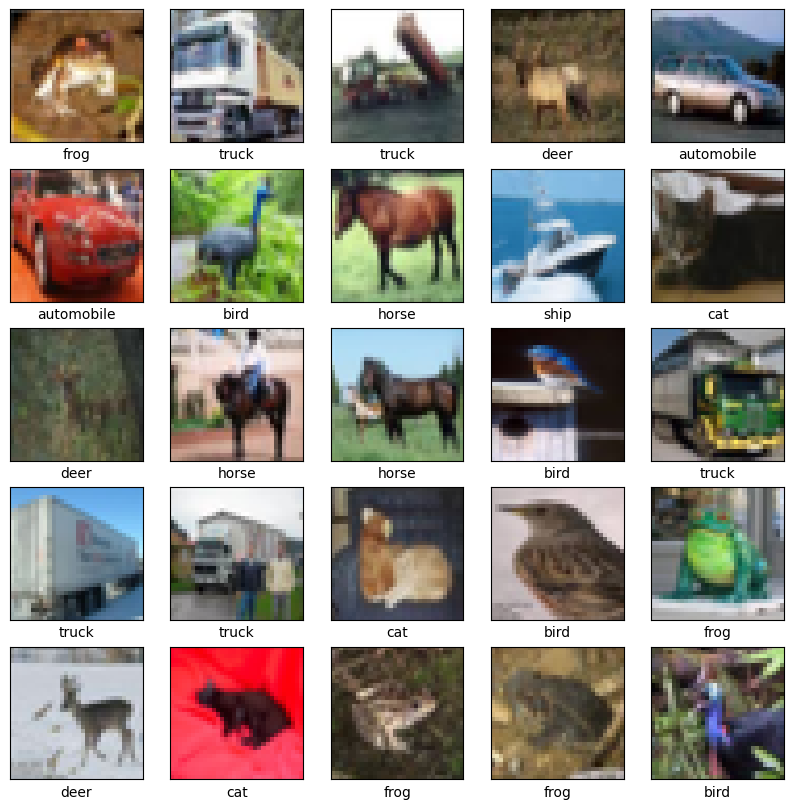

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1. Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2. Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### Langkah 4.3. Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

### Langkah 4.5. Compile Model CNN

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5047 - accuracy: 0.4496 - val_loss: 1.2551 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1386 - accuracy: 0.5988 - val_loss: 1.0446 - val_accuracy: 0.6397
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9762 - accuracy: 0.6553 - val_loss: 0.9976 - val_accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8787 - accuracy: 0.6880 - val_loss: 0.9285 - val_accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8102 - accuracy: 0.7150 - val_loss: 0.9199 - val_accuracy: 0.6799
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7504 - accuracy: 0.7358 - val_loss: 0.8686 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7090 - accuracy: 0.7509 - val_loss: 0.8420 - val_accuracy

## Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.9070 - accuracy: 0.7018 - 711ms/epoch - 2ms/step


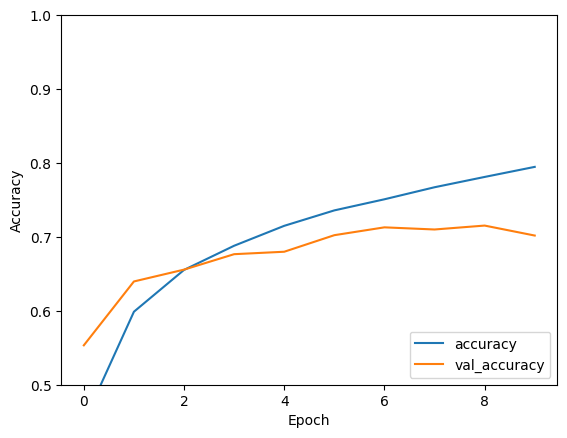

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7017999887466431


# Tugas

## Modifikasi model CNN
pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fit the model with EarlyStopping callback
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 18s 10ms/step - loss: 1.7380 - accuracy: 0.4094 - val_loss: 1.8233 - val_accuracy: 0.3915
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2899 - accuracy: 0.5406 - val_loss: 1.2214 - val_accuracy: 0.5639
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1582 - accuracy: 0.5892 - val_loss: 1.0514 - val_accuracy: 0.6269
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0633 - accuracy: 0.6279 - val_loss: 1.2910 - val_accuracy: 0.5644
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9998 - accuracy: 0.6499 - val_loss: 0.8792 - val_accuracy: 0.6858
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9457 - accuracy: 0.6703 - val_loss: 0.9353 - val_accuracy: 0.6704
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9153 - accuracy: 0.6793 - val_loss: 0.8779 - val_

313/313 - 1s - loss: 0.5712 - accuracy: 0.8010 - 1s/epoch - 4ms/step


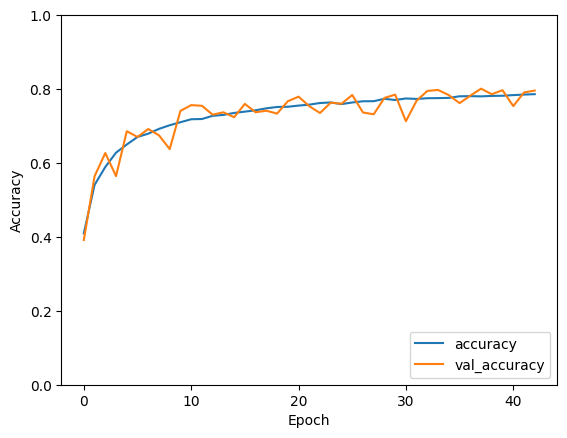

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.8009999990463257


## Buat model CNN untuk klasifikasi dataset MNIST

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0478 - val_accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0365 - val_accuracy: 0.9915
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0375 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0435 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0398 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0412 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0392 -

313/313 - 2s - loss: 0.0521 - accuracy: 0.9902 - 2s/epoch - 5ms/step


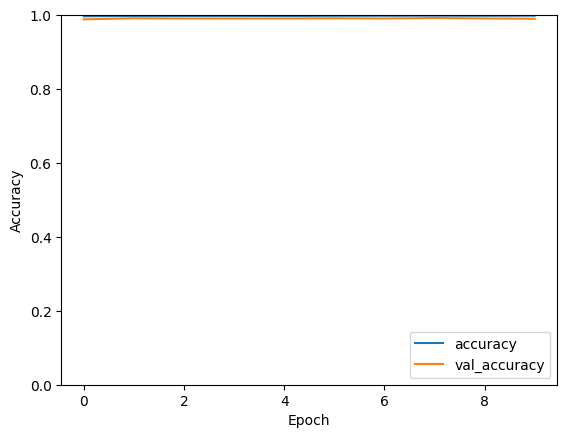

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.9901999831199646
